<a href="https://colab.research.google.com/github/jdmedinatobon/proyectoMachineLearning/blob/master/EntrenamientoModelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip3 install xgboost

In [0]:
import os
import numpy as np
import nibabel as nib
import csv
%tensorflow_version 2.x
import tensorflow as tf
import time
import scipy.stats as st
import sklearn as sk
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing

TensorFlow 2.x selected.


In [0]:
pathDatos = "drive/My Drive/datosDescriptoresPruebaV3.txt"
separador = ";"

def importarDatos(pArchivo):

  datos = []

  archivo = open(pArchivo, "r")
  lineas = archivo.readlines()
  for linea in lineas:
    linea = linea.replace('\n','')
    muestra = linea.split(separador)
    muestra=np.array(muestra)

    datos.append(muestra.astype(float))
  datos=np.array(datos)
  datosx=datos[:,0:datos[0].shape[0]-2]
  datosy=datos[:,datos[0].shape[0]-1]
  datosy=datosy.astype(int)
  return datosx,datosy
    

In [0]:
datos_x, datos_y = importarDatos(pathDatos)

# Preprocesamiento

In [0]:
def normalizar(pDatos_Para_Normalizar, pDatos):
 #Se inicializa el preprocesamiento de los datos
  normalizar = preprocessing.Normalizer().fit(pDatos_Para_Normalizar) #se obtiene una funcion que permita a 
  #partir de la media y los valores maximos y minimos de los datos de entrenamiento de este modelo, normalizar los datos de prueba y de entrenamiento
  dato_normal = normalizar.transform(pDatos) #Datos normailzados y con los cuales se entrenarán los modelos 
  return dato_normal

def darComponentesPrincipales(x, pNumComponentes):
    pca = PCA(n_components = pNumComponentes)
    pca.fit(x)
    return pca

def darBlanqueamiento(x, pNumComponentes):
    pca = PCA(whiten = True)
    pca.fit(x)
    return pca


In [0]:
datos_x=normalizar(datos_x,datos_x)

In [0]:
n=100
error=[]
Proba_error_prueba=100000
error_actual=1000000
Proba_error_prueba_tan=100000
modeloPrueba = MLPClassifier(activation = 'relu',hidden_layer_sizes=(n,), max_iter=1, batch_size=2, solver='adam', tol=0.001, warm_start =True,momentum=0.6, learning_rate_init=0.001, learning_rate = 'adaptive', nesterovs_momentum=True, power_t=0.5)#0.6
for i in range(0,150):
    modeloPrueba.fit(datos_x,datos_y)
    error_actual = 1-modeloPrueba.score(datos_x,datos_y)
    error.append(error_actual)
    if(error_actual<Proba_error_prueba):
        N_neuronas=n
        fcn_activacion="tanh"
        modelo = modeloPrueba
        Proba_error_prueba = error_actual
    if(error_actual<Proba_error_prueba_tan):
        N_neuronas_tan=n
        modelo_tan = modeloPrueba
        Proba_error_prueba_tan = error_actual
print("Número de neuronas utilizadas para la mejor probabilidad de error para tanh descenso de gradiente")
print(N_neuronas_tan)
print("Mejor probabilidad de acierto para función de activación tanh con desdenso de gradiente")
print(1-Proba_error_prueba_tan)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Número de neuronas utilizadas para la mejor probabilidad de error para tanh descenso de gradiente
100
Mejor probabilidad de acierto para función de activación tanh con desdenso de gradiente
0.3372222222222222


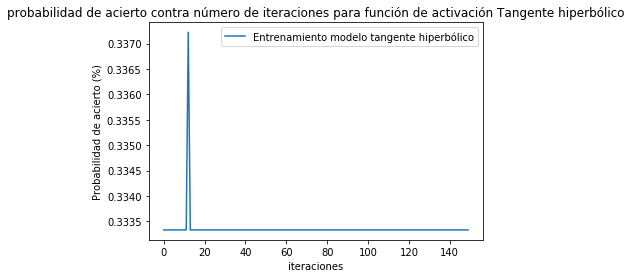

In [0]:
plt.plot((1-np.array(error)), label = "Entrenamiento modelo tangente hiperbólico") 
plt.xlabel('iteraciones') 
plt.ylabel('Probabilidad de acierto (%)') 
plt.title('probabilidad de acierto contra número de iteraciones para función de activación Tangente hiperbólico') 
plt.legend() 
plt.show()

In [0]:
modelo.predict(datos_x)

array([0, 0, 0, ..., 0, 0, 0])